# Stock Market Data From Yahoo Finance



#### Introduction



#### Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Yahoo Finance. By looking at data from the stock market, particularly some giant technology stocks and others. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history. Predicted future stock prices through a Monte Carlo method!

#### Questions
#### In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [270]:

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [271]:
# For time stamps
from datetime import datetime

# For division
from __future__ import division

Section 1 - Basic Analysis of Stock Information
 
 
In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [237]:
!pip install yfinance
import yfinance as yf

In [272]:

# List of tech stocks for analytics
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Set up start and end time for data grab
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

# For-loop for grabbing Yahoo Finance data using yfinance and setting it as a dataframe
stock_data = {}
for stock in tech_list:
    # Download stock data using yfinance
    stock_data[stock] = yf.download(stock, start=start, end=end)

# Example: Print the first few rows of the AAPL stock data
print(stock_data['AAPL'].head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-29  146.100006  146.720001  140.679993  142.479996  140.918640   
2022-09-30  141.279999  143.100006  138.000000  138.199997  136.685547   
2022-10-03  138.210007  143.070007  137.690002  142.449997  140.888977   
2022-10-04  145.029999  146.220001  144.259995  146.100006  144.498978   
2022-10-05  144.070007  147.380005  143.009995  146.399994  144.795685   

               Volume  
Date                   
2022-09-29  128138200  
2022-09-30  124925300  
2022-10-03  114311700  
2022-10-04   87830100  
2022-10-05   79471000  


In [174]:
print(stock_data['AAPL'].head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-29  146.100006  146.720001  140.679993  142.479996  140.918640   
2022-09-30  141.279999  143.100006  138.000000  138.199997  136.685562   
2022-10-03  138.210007  143.070007  137.690002  142.449997  140.888977   
2022-10-04  145.029999  146.220001  144.259995  146.100006  144.498993   
2022-10-05  144.070007  147.380005  143.009995  146.399994  144.795670   

               Volume  
Date                   
2022-09-29  128138200  
2022-09-30  124925300  
2022-10-03  114311700  
2022-10-04   87830100  
2022-10-05   79471000  


In [175]:
# Summary stats for Apple Stock
print(stock_data['AAPL'].describe())

             Open        High         Low       Close   Adj Close  \
count  502.000000  502.000000  502.000000  502.000000  502.000000   
mean   177.763686  179.531793  176.162749  177.930159  177.084814   
std     25.327878   25.346421   25.221617   25.294427   25.652332   
min    126.010002  127.769997  124.169998  125.019997  123.855087   
25%    161.270000  162.079998  159.855000  160.777504  159.522610   
50%    177.355003  179.404999  176.504997  177.895004  176.855011   
75%    191.432503  192.645000  190.225002  191.419998  190.721020   
max    236.479996  237.229996  233.089996  234.820007  234.548523   

             Volume  
count  5.020000e+02  
mean   6.348056e+07  
std    2.654039e+07  
min    2.404830e+07  
25%    4.808795e+07  
50%    5.673425e+07  
75%    7.060792e+07  
max    3.186799e+08  


In [176]:
# General Info
print(stock_data['AAPL'].info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-09-29 to 2024-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB
None


<Axes: xlabel='Date'>

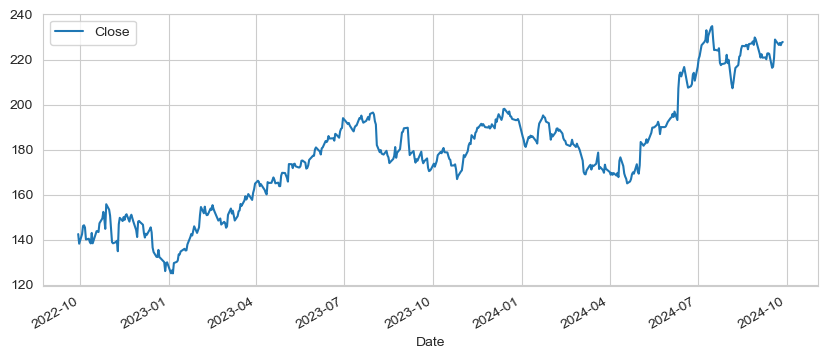

In [177]:
# Let's see a historical view of the closing price
stock_data['AAPL']['Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

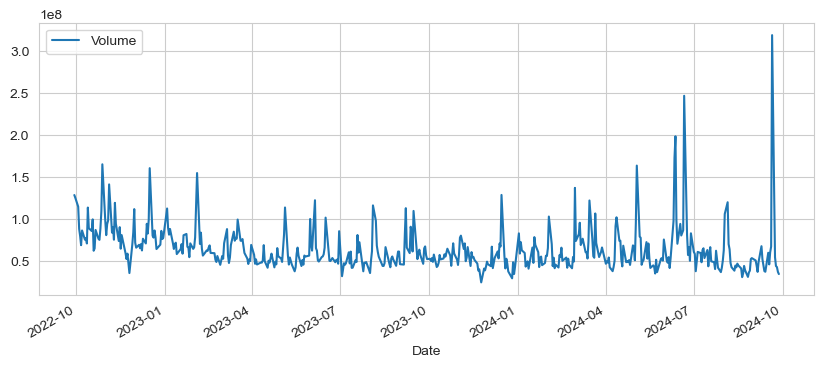

In [178]:
# Now let's plot the total volume of stock being traded each day over the past year

stock_data['AAPL']['Volume'].plot(legend=True, figsize=(10,4))

In [179]:
# We can see that on Feb'2017 was the higher for AAPL stock being traded.

# Now that we've seen the visualizations for the closing price and the volume traded each day for AAPL stock.
# Let's go ahead and caculate the moving average for the AAPL stock.
# 

# For more info on the Moving Average(SMA & EMA) check out the following links:
# 
# 1.) http://www.investopedia.com/terms/m/movingaverage.asp
# 
# 2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

# In[19]:


# Pandas has a built-in rolling mean calculator

<Axes: title={'center': 'AAPL Closing Price and Moving Averages'}, xlabel='Date'>

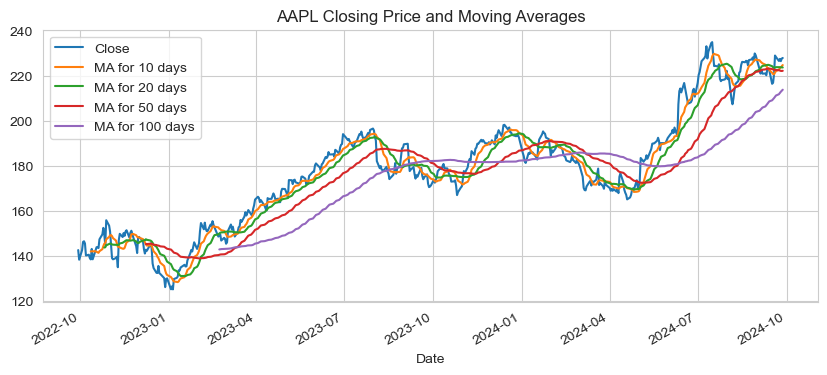

In [180]:
# Define the moving averages
MA_day = [10, 20, 50, 100]

# For each moving average, calculate it and add as a new column to the stock_data['AAPL'] DataFrame
for ma in MA_day:
    column_name = f'MA for {ma} days'
    stock_data['AAPL'][column_name] = stock_data['AAPL']['Close'].rolling(window=ma).mean()

# Now, let's plot all the additional Moving Averages for AAPL stock
stock_data['AAPL'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(subplots=False, figsize=(10,4), title='AAPL Closing Price and Moving Averages')

Section 2 - Daily Return Analysis
 

Now, that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. 

 
In order to do so, we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the APPL stock.
 


<Axes: xlabel='Date'>

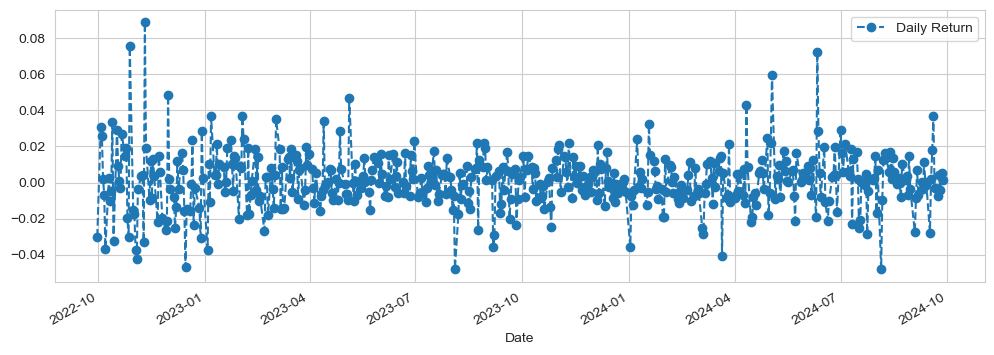

In [181]:
# We'll use pct_change to find the percent change for each day
stock_data['AAPL']['Daily Return'] = stock_data['AAPL']['Close'].pct_change()

# Lets plot the daily return percentage
stock_data['AAPL']['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

<Axes: >

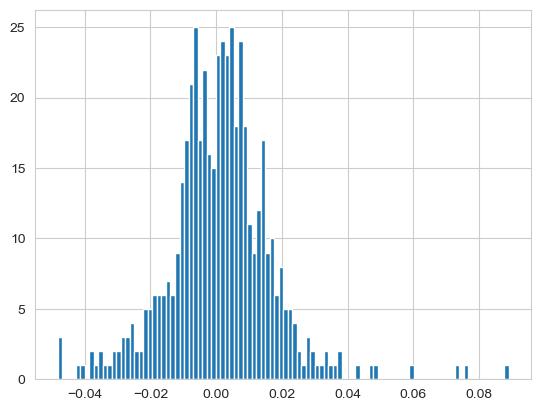

In [182]:
# Great, now let's get an overall look at the average daily return using a histogram. 
#By using seaborn to create both a histogram and kde plot on the same figure.

# only with histogram
stock_data['AAPL']['Daily Return'].hist(bins=100)

C:\Users\Navdeep\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


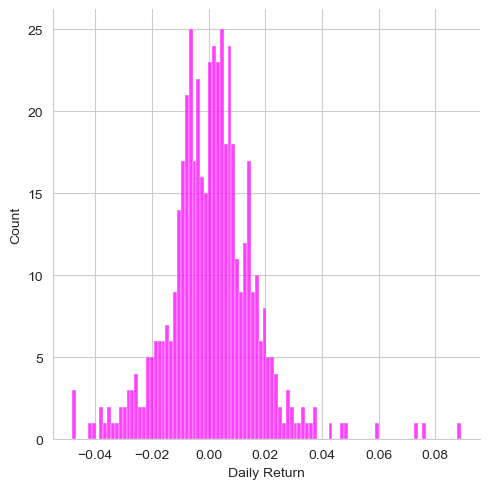

In [183]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.displot(stock_data['AAPL']['Daily Return'].dropna(), bins=100, color='magenta')


# Now what if we wanted to analyze the returns of all the stocks in our list? 
# For that, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.


In [184]:
# Grab all the closing prices for the tech stock list into one DataFrame

closingprice_df = yf.download(tech_list, start=start, end=end)['Close']
print(closingprice_df.head())

[*********************100%***********************]  4 of 4 completed

Ticker                           AAPL        AMZN       GOOGL        MSFT
Date                                                                     
2022-09-29 00:00:00+00:00  142.479996  114.800003   97.419998  237.500000
2022-09-30 00:00:00+00:00  138.199997  113.000000   95.650002  232.899994
2022-10-03 00:00:00+00:00  142.449997  115.879997   98.639999  240.740005
2022-10-04 00:00:00+00:00  146.100006  121.089996  101.639999  248.880005
2022-10-05 00:00:00+00:00  146.399994  120.949997  101.430000  249.199997


In [185]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [186]:
# Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

# GOOGL is a Alphabet Inc Class A Stock.

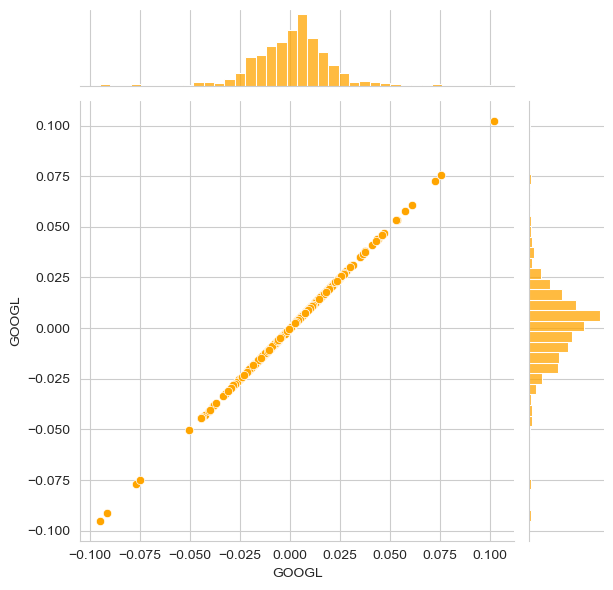

In [187]:
#Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_returns, kind='scatter', color='orange')
# So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 
# 

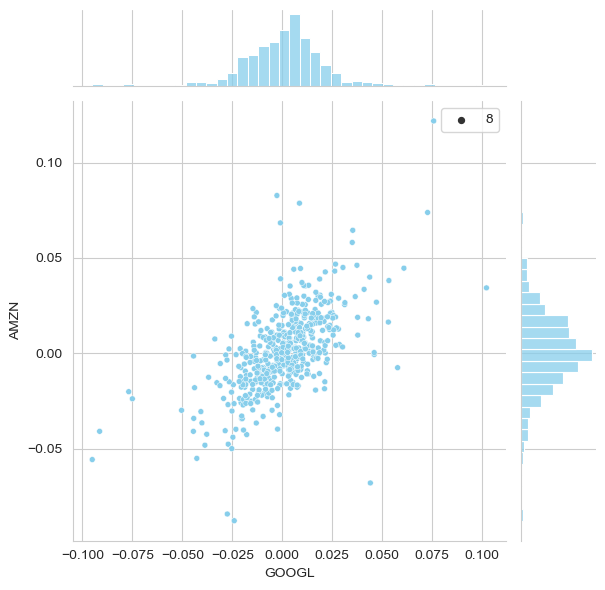

In [188]:
# We'll use joinplot to compare the daily returns of Google and Amazon.

sns.jointplot(x='GOOGL',y='AMZN',data= tech_returns, kind='scatter',size=8, color='skyblue')



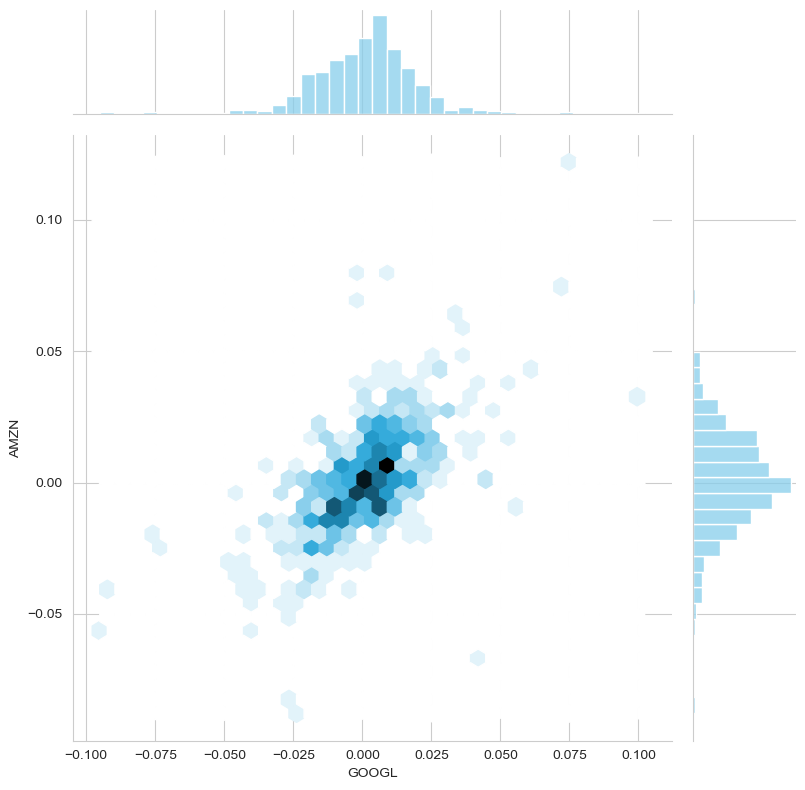

In [189]:
# with Hex plot
sns.jointplot(x= 'GOOGL',y= 'AMZN',data=tech_returns, kind='hex', height=8, color='skyblue')

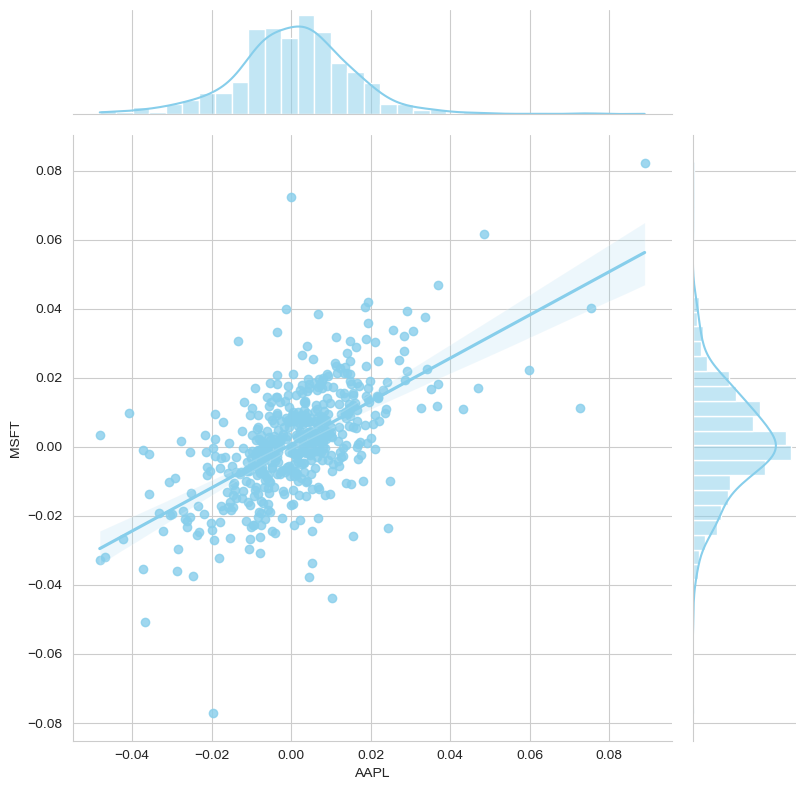

In [190]:
# Lets check out for Apple and Microsoft with reg jointplot
sns.jointplot(x='AAPL', y= 'MSFT',data = tech_returns, kind='reg', height=8, color='skyblue')


# Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:
# 
# Url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient
# 
# But for a quick intuitive sense, check out the picture below.


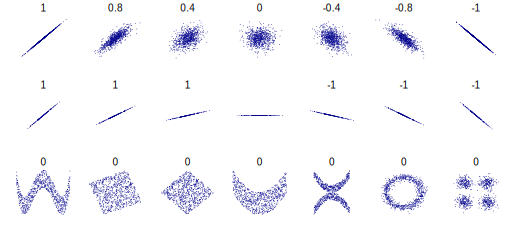

In [191]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')



# Seaborn and Pandas make it very easy to repeat this comparison analysis for every possible combination of 
#stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot.


C:\Users\Navdeep\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


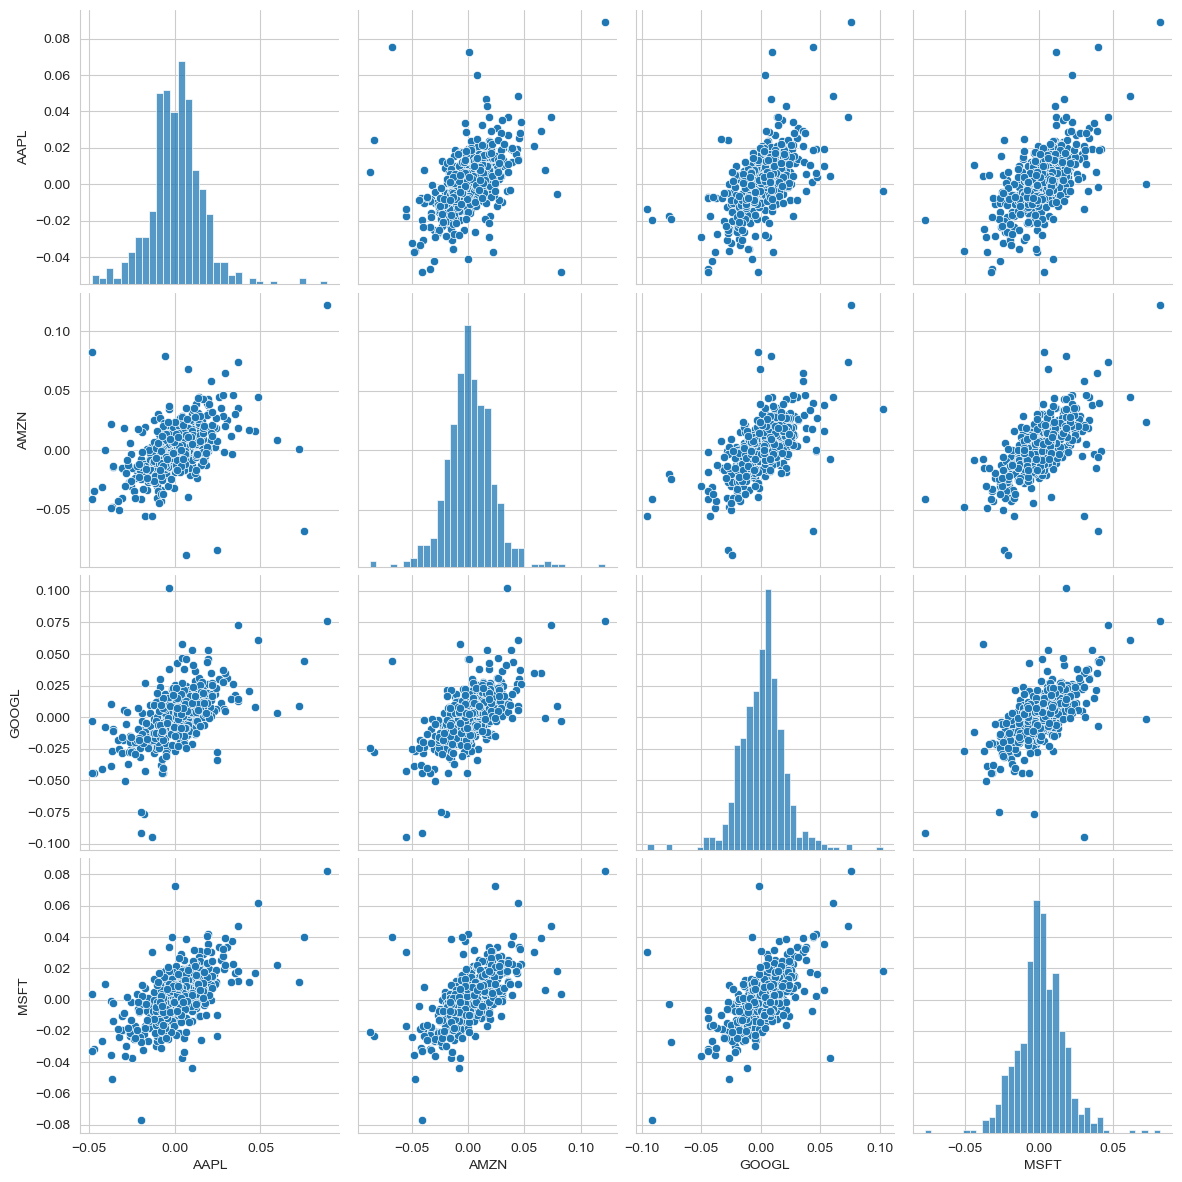

In [192]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),height=3)


# Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. 

# Below is an example of utilizing the full power of seaborn to achieve this result.


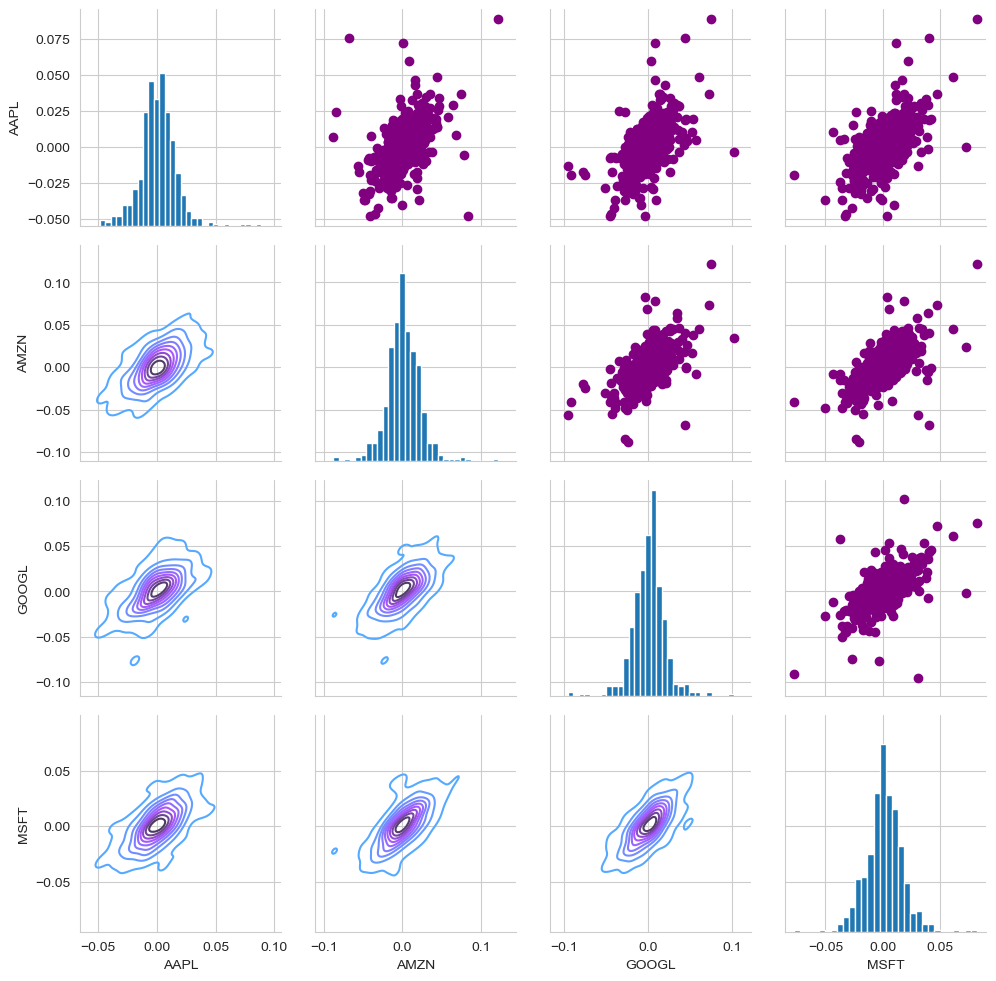

In [193]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [194]:
# We can also analyze the correlation of the closing prices using this exact same technique. 
#Here it is shown, the code repeated from above with the exception of the DataFrame called.


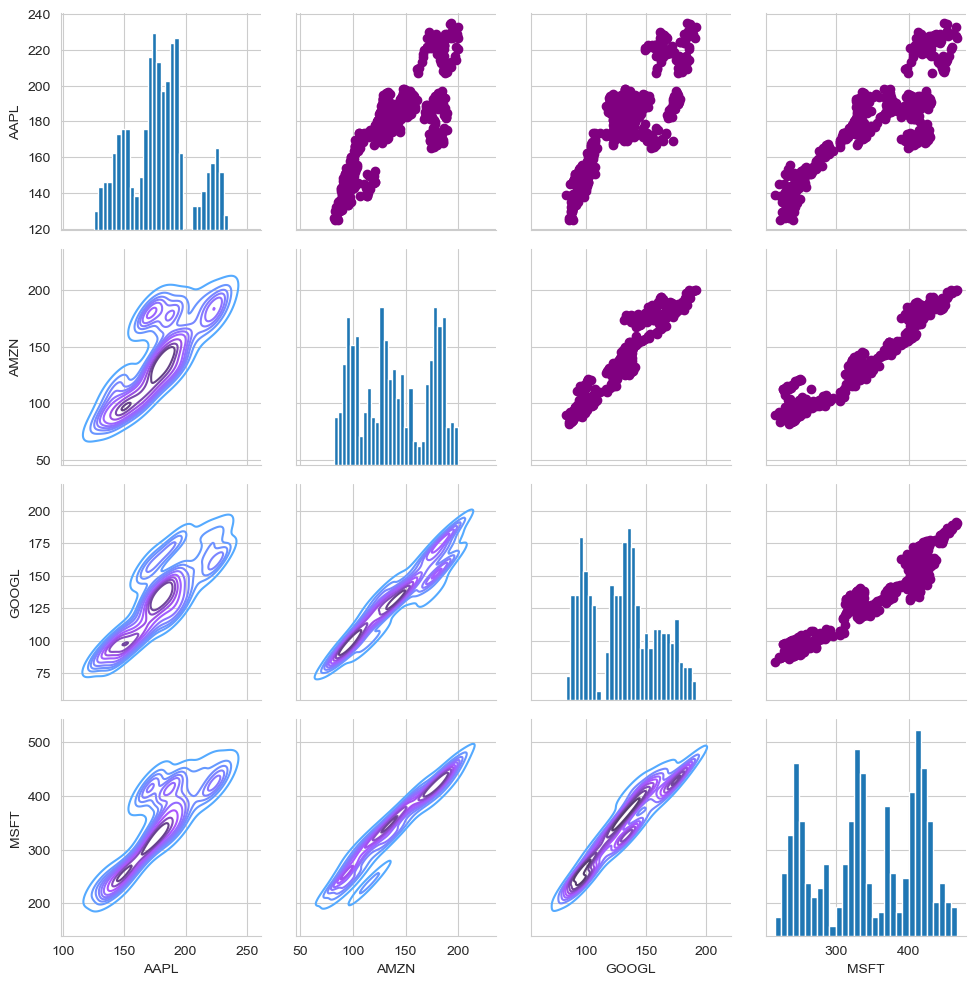

In [195]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


# Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Google and Amazon stocks.


<Axes: xlabel='Ticker', ylabel='Ticker'>

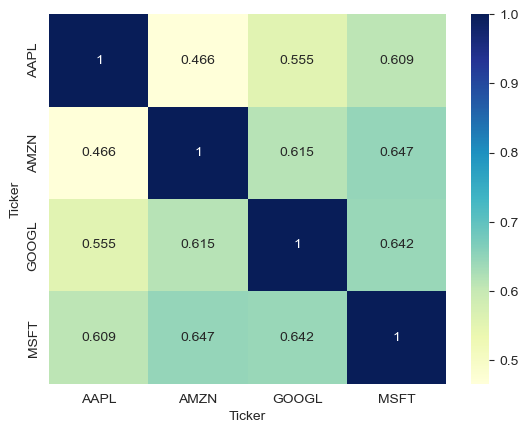

In [196]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<Axes: xlabel='Ticker', ylabel='Ticker'>

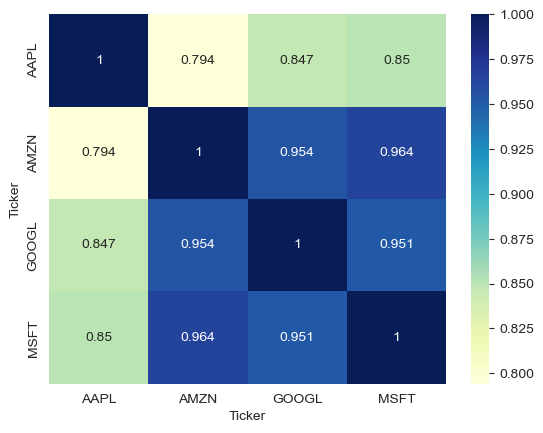

In [197]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [198]:
# Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had 
# the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively 
# correlated.

# Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

# Risk Analysis

#### There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).


In [199]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [200]:
rets.head()


Ticker                         AAPL      AMZN     GOOGL      MSFT
Date                                                             
2022-09-30 00:00:00+00:00 -0.030039 -0.015679 -0.018169 -0.019368
2022-10-03 00:00:00+00:00  0.030753  0.025487  0.031260  0.033663
2022-10-04 00:00:00+00:00  0.025623  0.044960  0.030414  0.033812
2022-10-05 00:00:00+00:00  0.002053 -0.001156 -0.002066  0.001286
2022-10-06 00:00:00+00:00 -0.006626 -0.005374 -0.000099 -0.009671

Text(0, 0.5, 'Risk')

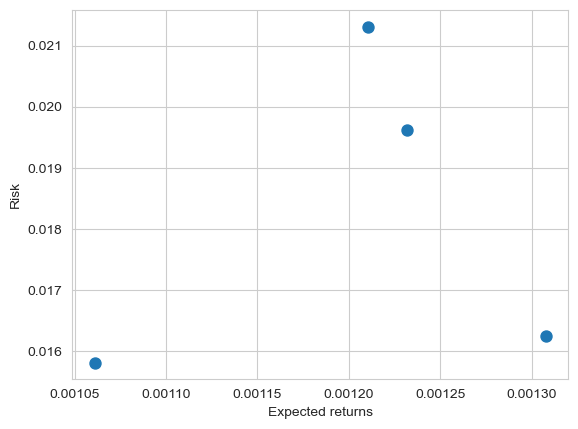

In [201]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

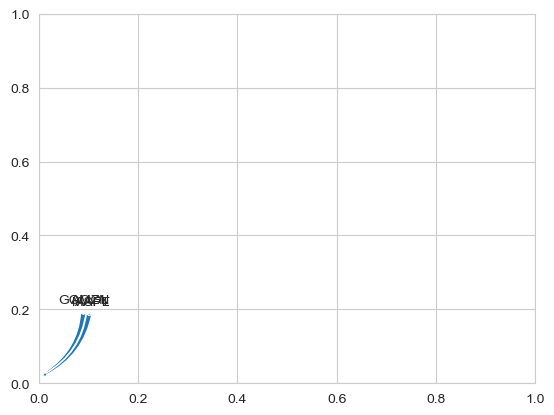

In [202]:
# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))


# By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

In [203]:
# ### Value at Risk

# Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.
# 
# #### Value at risk using the "bootstrap" method
# For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile
# 
# Let's go ahead and repeat the daily returns histogram for Apple stock.

C:\Users\Navdeep\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


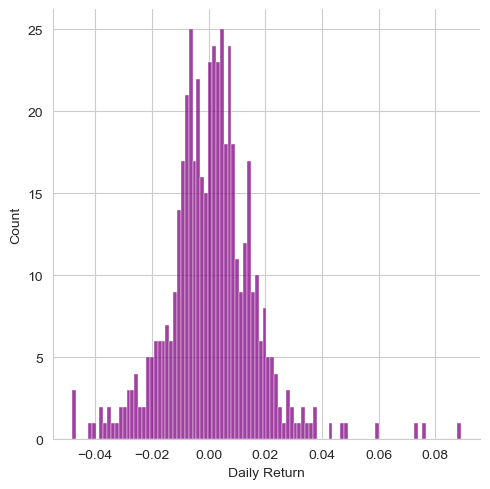

In [204]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.displot(stock_data['AAPL']['Daily Return'].dropna(),bins=100,color='purple')


# Now we can use quantile to get the risk value for the stock.

In [205]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets['AAPL'].quantile(0.05)


# The 0.05 empirical quantile of daily returns is at -0.016.
#That means that with 95% confidence, our worst daily loss will not exceed 1.6%. 
#If we have a 1 million dollar investment, our one-day 5% VaR is 0.016 * 1,000,000 = $16,000.



-0.025295980990260425

In [206]:
# For AMZN stocks
rets["AMZN"].quantile(0.05)

-0.032242712137328766

In [207]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.02713298993105895

In [208]:
# For MSFT stocks
rets["MSFT"].quantile(0.05)

-0.024248667184803674

# Value at Risk using the Monte Carlo method
#### Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.
 
# Let's start with a brief explanation of what we're going to do:
 
#### We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

#### This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

#### Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.
 
#### For more info on the Monte Carlo method for stocks and simulating stock prices with GBM model ie. geometric Brownian motion (GBM).

#### check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

#### To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using in the Yahoo finance. 

In [209]:
rets.head()

Ticker                         AAPL      AMZN     GOOGL      MSFT
Date                                                             
2022-09-30 00:00:00+00:00 -0.030039 -0.015679 -0.018169 -0.019368
2022-10-03 00:00:00+00:00  0.030753  0.025487  0.031260  0.033663
2022-10-04 00:00:00+00:00  0.025623  0.044960  0.030414  0.033812
2022-10-05 00:00:00+00:00  0.002053 -0.001156 -0.002066  0.001286
2022-10-06 00:00:00+00:00 -0.006626 -0.005374 -0.000099 -0.009671

In [210]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']


# Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.


In [211]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


# Awesome! Now lets put above function to work.

In [212]:
# For Google Stock - GOOGL
stock_data['GOOGL'].head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-29   98.639999   98.639999   95.959999   97.419998   97.179367   
2022-09-30   97.050003   98.900002   95.559998   95.650002   95.413742   
2022-10-03   96.760002   99.290001   96.519997   98.639999   98.396355   
2022-10-04  100.440002  101.839996  100.379997  101.639999  101.388947   
2022-10-05   99.830002  101.930000   98.800003  101.430000  101.179459   

              Volume  
Date                  
2022-09-29  31047200  
2022-09-30  32941500  
2022-10-03  27982000  
2022-10-04  28850800  
2022-10-05  22176900

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

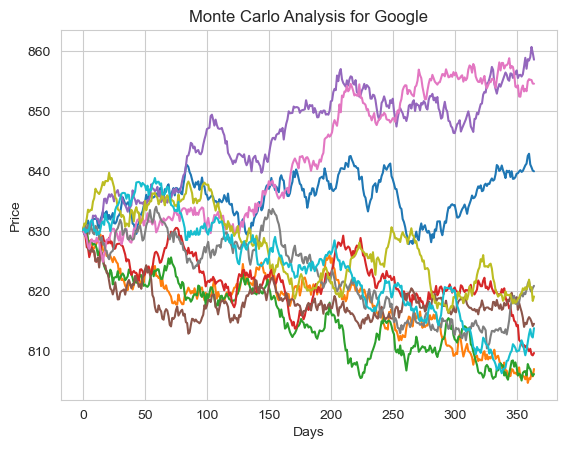

In [213]:
start_price = 830.09

for run in range(10):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [214]:
# For Amazon Stock - AMZN
stock_data['AMZN'].head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-29  115.599998  116.070000  113.059998  114.800003  114.800003   
2022-09-30  114.080002  116.919998  112.839996  113.000000  113.000000   
2022-10-03  113.580002  116.910004  112.449997  115.879997  115.879997   
2022-10-04  119.889999  123.000000  119.790001  121.089996  121.089996   
2022-10-05  118.580002  121.750000  117.690002  120.949997  120.949997   

              Volume  
Date                  
2022-09-29  58969700  
2022-09-30  59479600  
2022-10-03  50941900  
2022-10-04  62812600  
2022-10-05  48217500

Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

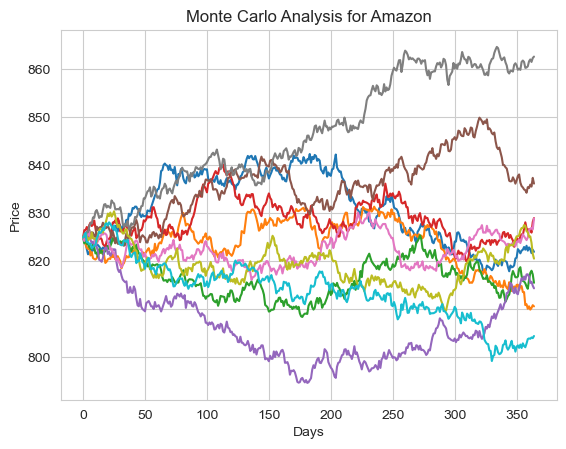

In [215]:
start_price = 824.95

for run in range(10):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

In [216]:
# For Apple Stock - AAPL
stock_data['AAPL'].head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-29  146.100006  146.720001  140.679993  142.479996  140.918640   
2022-09-30  141.279999  143.100006  138.000000  138.199997  136.685562   
2022-10-03  138.210007  143.070007  137.690002  142.449997  140.888977   
2022-10-04  145.029999  146.220001  144.259995  146.100006  144.498993   
2022-10-05  144.070007  147.380005  143.009995  146.399994  144.795670   

               Volume  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                    
2022-09-29  128138200             NaN             NaN             NaN   
2022-09-30  124925300             NaN             NaN             NaN   
2022-10-03  114311700             NaN             NaN             NaN   
2022-10-04   87830100             NaN             NaN             NaN   
2022-10-05   79471000             NaN             NaN             NaN   

            MA for 100 days  Daily Return  
Date                                       
2022-09-29              NaN           NaN  
2022-09-30              NaN     -0.030039  
2022-10-03              NaN      0.030753  
2022-10-04              NaN      0.025623  
2022-10-05              NaN      0.002053

Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

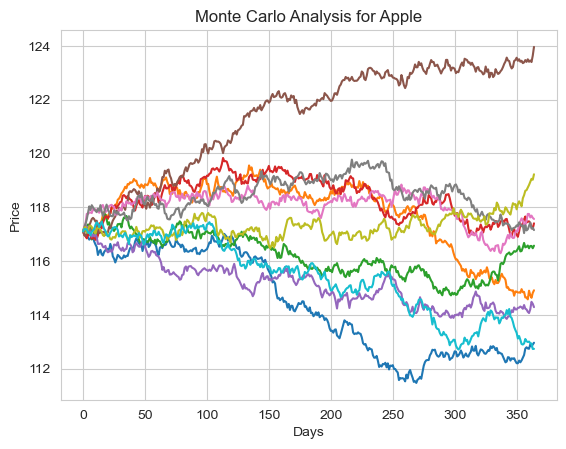

In [217]:
start_price = 117.10

for run in range(10):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [218]:
# For Microsoft Stock - MSFT
stock_data['MSFT'].head()


Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-29  238.889999  239.949997  234.410004  237.500000  233.475037   
2022-09-30  238.289993  240.539993  232.729996  232.899994  228.952972   
2022-10-03  235.410004  241.610001  234.660004  240.740005  236.660141   
2022-10-04  245.089996  250.360001  244.979996  248.880005  244.662155   
2022-10-05  245.990005  250.580002  244.100006  249.199997  244.976746   

              Volume  
Date                  
2022-09-29  27484200  
2022-09-30  35694800  
2022-10-03  28880400  
2022-10-04  34888400  
2022-10-05  20347100

Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

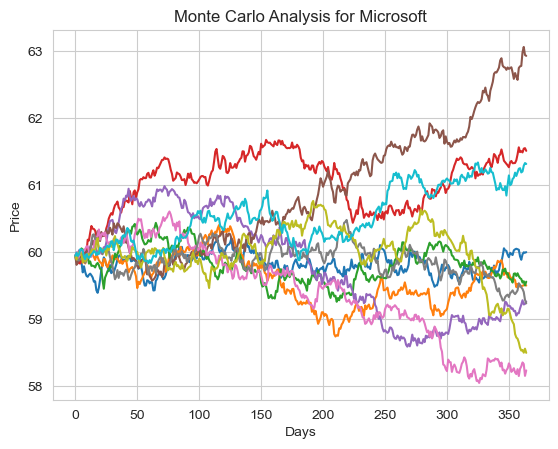

In [219]:
start_price = 59.94

for run in range(10):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

In [220]:
# Let's go ahead and get a histogram of the end results for a much larger run.
#(note: This could take a little while to run , depending on the number of runs chosen)


In [221]:
# Lets start with Google stock price
start_price = 830.09

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


# Now that we have our array of simulations, we can go ahead and plot a 
# histogram ,as well as use qunatile to define our risk for this stock.
# 
# For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Text(0.5, 1.0, 'Final price distribution for Google Stock(GOOGL) after 365 days')

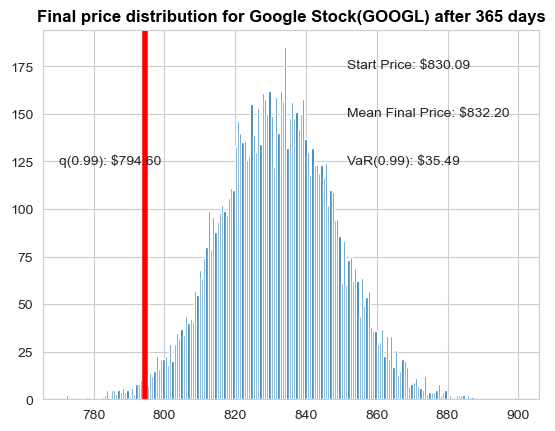

In [222]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Google Stock(GOOGL) after %s days" % days, weight='bold', color='Black')


# Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google Stock(GOOGL), which looks to be $17.98 for every investment of 
# 830.09 (The price of one initial Google Stock).
# 
# This basically means for every initial GOOGL stock you purchase you're putting about $17.98 at risk 99% of the time from our Monte Carlo Simulation.
# 

# Now lets plot remaining Stocks to estimate the VaR with our Monte Carlo Simulation.

In [223]:
# For Amazon Stock Price
start_price = 824.95

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Amazon Stock(AMZN) after 365 days')

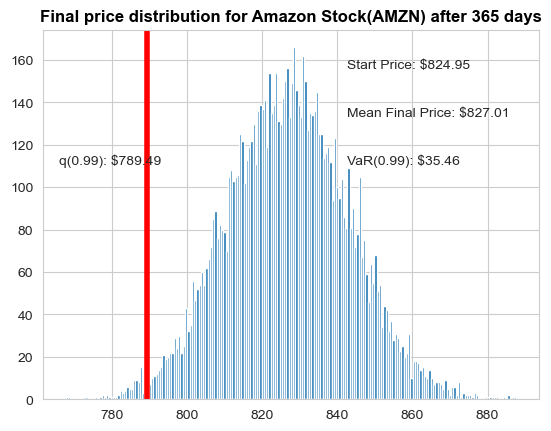

In [224]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Amazon Stock(AMZN) after %s days" % days, weight='bold', color='Black')


# This basically means for every initial AMZN stock you purchase you're putting about $18.13 at risk 99% of the time from our Monte Carlo Simulation.


In [225]:
# For Apple Stock Price
start_price = 117.10

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Apple Stock(AAPL) after 365 days')

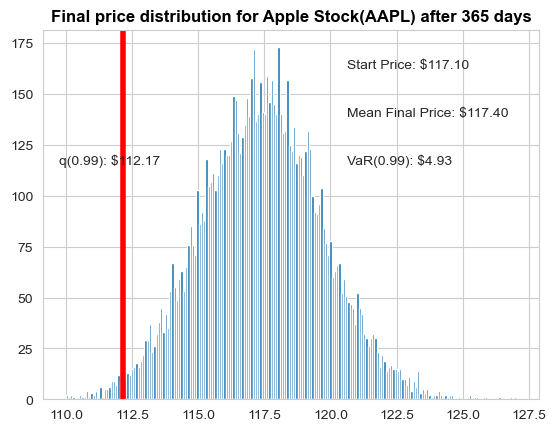

In [226]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Apple Stock(AAPL) after %s days" % days, weight='bold', color='Black')


# Great! This basically means for every initial AAPL stock you purchase you're putting about $2.48 at risk 99% of the time from our Monte Carlo Simulation.


In [274]:
# For Microsoft Stock Price
start_price = 59.94

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Microsoft Stock(MSFT) after 365 days')

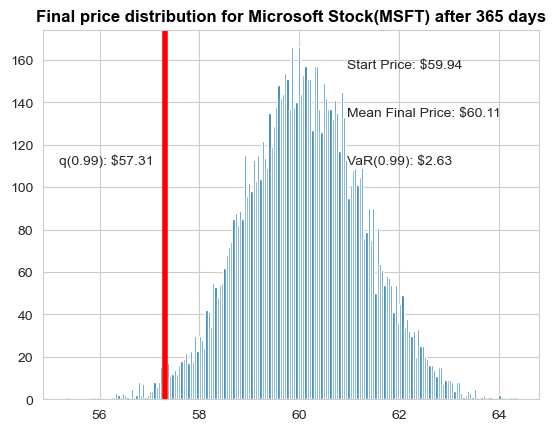

In [277]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Microsoft Stock(MSFT) after %s days" % days, weight='bold', color='Black')


# Nice, This basically means for every initial MSFT stock you purchase you're putting about $1.28 at risk 99% of the time from our Monte Carlo Simulation.
